### Gerekli Kütüphaneler

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt 
from glob import glob # kaç tane class'ım olduğunu öğrenmek için

In [2]:
train_path = "fruits-360-original-size/Training/"
test_path = "fruits-360-original-size/Test/"

In [3]:
img = load_img(train_path + "apple_red_1/r0_100.jpg")

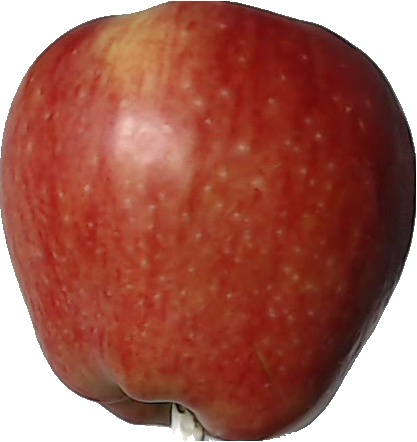

In [4]:
img

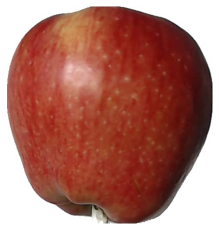

In [6]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
# şimdi resmi arraye çeviricez

In [8]:
x = img_to_array(img)
print(x.shape)

(442, 417, 3)


In [9]:
# en boy ve rengi ifade ediyor

In [10]:
className = glob(train_path + '/*') # train path'imizin içerisine gir train path'imizin içerisinde bulduğun herhangi bir isimdeki dosyayı benim className imin içerisine yükle

In [11]:
len(className)

24

In [12]:
className

['fruits-360-original-size/Training\\apple_6',
 'fruits-360-original-size/Training\\apple_braeburn_1',
 'fruits-360-original-size/Training\\apple_crimson_snow_1',
 'fruits-360-original-size/Training\\apple_golden_1',
 'fruits-360-original-size/Training\\apple_golden_2',
 'fruits-360-original-size/Training\\apple_golden_3',
 'fruits-360-original-size/Training\\apple_granny_smith_1',
 'fruits-360-original-size/Training\\apple_hit_1',
 'fruits-360-original-size/Training\\apple_pink_lady_1',
 'fruits-360-original-size/Training\\apple_red_1',
 'fruits-360-original-size/Training\\apple_red_2',
 'fruits-360-original-size/Training\\apple_red_3',
 'fruits-360-original-size/Training\\apple_red_delicios_1',
 'fruits-360-original-size/Training\\apple_red_yellow_1',
 'fruits-360-original-size/Training\\apple_rotten_1',
 'fruits-360-original-size/Training\\cabbage_white_1',
 'fruits-360-original-size/Training\\carrot_1',
 'fruits-360-original-size/Training\\cucumber_1',
 'fruits-360-original-size/Tr

In [13]:
numberOfClass = len(className)

### CNN ile modelimizi oluşturmaya başlayalım

In [14]:
#Kullanacağımız model tipi sequential. Sequential, Keras’ta bir model oluşturmanın en kolay yoludur. Katman ile bir model katman oluşturmanıza izin verir.

model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3), input_shape = x.shape, activation = "relu" )) # Layer ekliyoruz (2 ye 2 lik (2D) arrayden oluşan yapı)
model.add(MaxPooling2D())

# başka da ekleyebiliriz
model.add(Conv2D(filters = 32,kernel_size = (3,3), activation = "relu" )) 
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64,kernel_size = (3,3), activation = "relu" )) 
model.add(MaxPooling2D())

# şimdi flatten yapıcaz 

model.add(Flatten())
model.add(Dense(1024, activation = "relu" )) # 1024 nörondan oluşan dense layer ekledik
model.add(Dropout(0.5)) # 1024 tane den yüzde 50 sini kapattık her seferinde 512 tanesi aktif oluyor

model.add(Dense(numberOfClass,activation = "softmax")) # output layerimizi ekledik
# output layerimizdaki nöron sayısı class sayımız kadar olmalı o yuzden numberOfClass'ı yazdık



### Modelin Derlenmesi
> * Modelin derlenmesi model.compile() fonksiyonu ile yapılır. Bu fonksiyon optimizer, kayıp ve metrik olmak üzere üç parametre alır. Aslında birçok parametre alır fakat biz üç tanesini kullanacağız. Diğer parametreleri kerasın kendi sayfasında bulabilirsiniz.

> * Optimizer, öğrenme oranını kontrol eder. Optimizer olarak “adam” kullanıyoruz. Adam genellikle birçok durumda kullanmak için iyi bir optimizasyon algoritmasıdır. Adam algoritması, eğitim boyunca öğrenme oranını ayarlar.

> * Kayıp fonksiyonumuz için ‘categorical_crossentropy’ kullanacağız. Bu, sınıflandırma problemleri için en yaygın kullanılan fonksiyon türüdür.

> * Eğitim sırasında modelin nasıl bir performans gösterdiğini yorumlamak için her bir epoch sonunda validation seti ile elde edilen doğruluk ve loss miktarını görmek için “accuracy” metriğini kullanırız.



In [15]:
model.compile(loss = "categorical_crossentropy",
             optimizer =  "adam",
             metrics = ["accuracy"])

In [16]:
batch_size = 32 # her bir iterasyonda 32 tane resmi train ediyoruz



In [17]:
a = glob(train_path + "/carrot_1"+"/*")

In [18]:
len(a)

101

### Data Generation -Train -Test

ImageDataGenerator ile Veri Büyütme

Keras derin öğrenme kitaplığı, bir modeli eğitirken veri büyütmeyi otomatik olarak kullanma yeteneği sağlar.Bu, ImageDataGenerator sınıfı kullanılarak elde edilir.

İlk olarak, sınıf somutlaştırılabilir ve veri büyütme türlerinin konfigürasyonu, sınıf kurucusunun argümanları ile belirtilir.

Piksel ölçekleme yöntemlerinin yanı sıra bir dizi teknik desteklenir. Görüntü verileri için beş ana tip veri büyütme tekniğine odaklanacağız; özellikle:

width_shift_range ve height_shift_range argümanları ile görüntü kaydırma,
horizontal_flip ve vertical_flip argümanları ile görüntü çevirme,
rotation_range argümanı ile görüntü döndürme,
brightness_range argümanı ile parlaklık ayarı,
zoom_range argümanı ile görüntü yakınlaştırma

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   horizontal_flip = True,
                                   zoom_range = 0.3)      # image yaratıyoruz (cunku yetersiz) yani data augmentation yapıyoruz

In [20]:
# test edeceğimiz datamızın orjinal olması önemli 

In [21]:
test_datagen= ImageDataGenerator(rescale = 1./255) # trainimizi normalize ettiğimiz için test datamızı da normalize etmemiz gerekir

In [22]:
train_generator = train_datagen.flow_from_directory( 
                                                    train_path,
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical')
                                                    
                                                    

Found 6231 images belonging to 24 classes.


In [23]:
test_generator = test_datagen.flow_from_directory( test_path,
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical')
                                                    
                                                    

Found 3110 images belonging to 24 classes.


In [25]:
# artık fit_generator yerine fit kullanılıyor 

In [27]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=3,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)


C:\Users\Aleyna\AppData\Local\Temp\ipykernel_21576\3510151119.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/3
50/50 [==============================] - 212s 4s/step - loss: 3.5270 - accuracy: 0.2244 - val_loss: 1.2714 - val_accuracy: 0.6888
Epoch 2/3
23/50 [============>.................] - ETA: 1:48 - loss: 1.4601 - accuracy: 0.5041

KeyboardInterrupt: 

In [24]:
# model save
model.save_weights("deneme.h5")

In [25]:
# model evaluation
print(hist.history.keys())

NameError: name 'hist' is not defined

In [28]:
plt.plot(hist.history["loss"], label = "Train loss")
plt.plot(hist.history["val_loss"], label = "Validation loss")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

NameError: name 'hist' is not defined

#### * Save history (zamandan kazanmak için mesela 100 tane epoch yapsak ve kaydetsek daha sonra tekrardan yapmamıza gerek kalmayacak)

In [29]:
import json 
with open("cnn_fruit_hist.json","w") as f:
    json.dump(hist.history,f)

NameError: name 'hist' is not defined

In [30]:
# load history

import codecs
with codecs.open("cnn_fruit_hist.json","r",encoding = "utf-8") as f:
                 h = json.loads(f.read())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)